Modeling a Zombie Apocalypse
============================

This example demonstrates how to solve a system of first order ODEs
using SciPy. Note that a Nth order equation can also be solved using
SciPy by transforming it into [a system of first order
equations](http://en.wikipedia.org/wiki/Ordinary_differential_equation#Reduction_to_a_first_order_system).
In a this lighthearted example, a system of ODEs can be used to model a
"zombie invasion", using the equations specified in [Munz et al.
2009](http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf).

The example uses the older `odeint` function from SciPy, but the last example is done using `solve_ivp` for comparison.

The system is given as:

dS/dt = P - B*S*Z - d*S
dZ/dt = B*S*Z + G*R - A*S*Z
dR/dt = d*S + A*S*Z - G*R

with the following notations:

*  S: the number of susceptible victims
*  Z: the number of zombies
*  R: the number of people "killed"
*  P: the population birth rate
*  d: the chance of a natural death
*  B: the chance the "zombie disease" is transmitted (an alive person becomes a zombie)
*  G: the chance a dead person is resurrected into a zombie
*  A: the chance a zombie is totally destroyed

This involves solving a system of first order ODEs given by: $dy/dt = f(y, t)$

Where $y = [S, Z, R]$.

The code used to solve this system is below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

Set the defining constants

In [2]:
P = 0	    # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

The equation implemented in a Python function.
Note that we have t as first argument, y as second: `solve_ivp` likes this order, while `odeint` has an option to specify which argument comes first.

In [3]:
# solve the system dy/dt = f(t, y)
def f(t, y):
	Si = y[0]
	Zi = y[1]
	Ri = y[2]
	# the model equations (see Munz et al. 2009)
	f0 = P - B*Si*Zi - d*Si
	f1 = B*Si*Zi + G*Ri - A*Si*Zi
	f2 = d*Si + A*Si*Zi - G*Ri
	return [f0, f1, f2]

Set the initial parameters for the first scenario

In [4]:
S0 = 500.     		# initial population
Z0 = 0        		# initial zombie population
R0 = 0        		# initial death population

y0 = [S0, Z0, R0]	# initial condition vector
t  = np.linspace(0, 5., 1000) 	# time grid

In [5]:
# solve the DEs
soln = odeint(f, y0, t, tfirst=True)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

Create the first plot

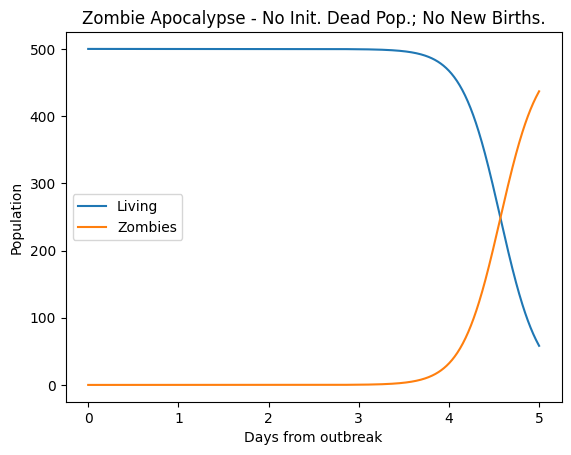

In [6]:
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc='center left');

Change some of the initial conditions

In [7]:
R0 = 0.01 * S0   # 1% of initial pop is dead
y0 = [S0, Z0, R0]

Solve and plot

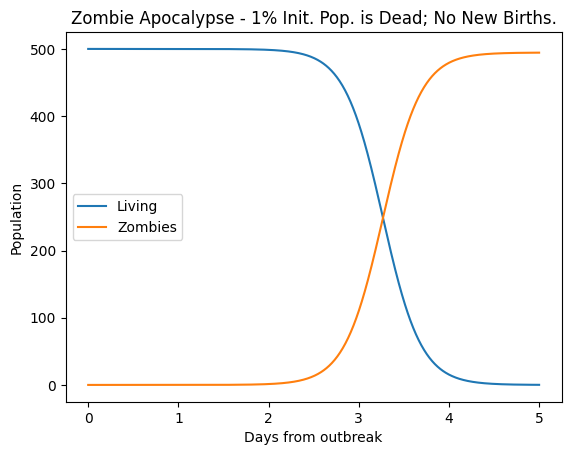

In [8]:
soln = odeint(f, y0, t, tfirst=True)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc='center left');

Change the initial conditions so that people are born

Use `solve_ivp` here; it picks it steps automatically (given a time interval), but using `t_eval` will evaluate the result at these timestamps, useful for the plot.
Note how the evaluated results are in `soln.y`, but transposed compared to `odeint`

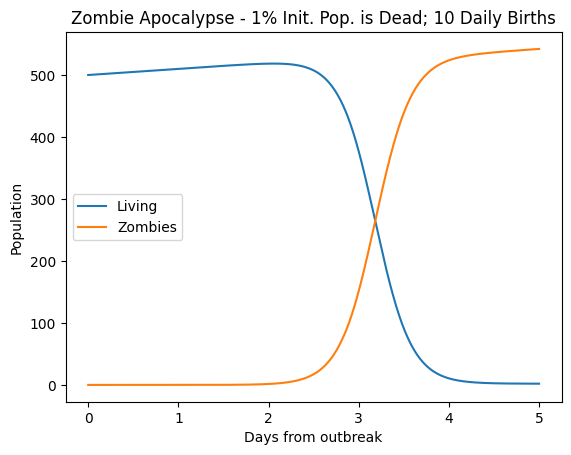

In [9]:
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = solve_ivp(f, [0, 5], y0, t_eval=t)
S = soln.y[0, :]
Z = soln.y[1, :]
R = soln.y[2, :]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc='center left');